### 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org


### 기본 그래프

    선(line), 막대(bar), 히스토그램(histogram), 산포도(scatter), 상자(box)
    
    
### 질적 데이터

+ 요약 방법 : 도표
+ 정리 방법 : 도수 분포표, 분할표
+ 그래프 : 막대 그래프, 원 그래프, ...


### 양적 데이터

+ 요약 방법 : 수치
+ 정리 방법 : 산술평균, 중앙값, ...
+ 그래프 : 히스토그램, Boxplot, Scatter plot, 시계열(선) 그래프, ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

### 1. 선 그래프

<AxesSubplot:>

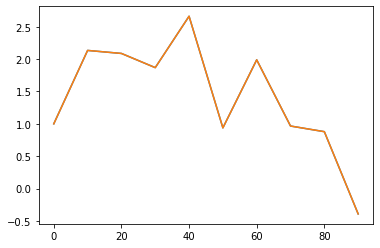

In [9]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s
s.plot()
s.plot.line()

<AxesSubplot:>

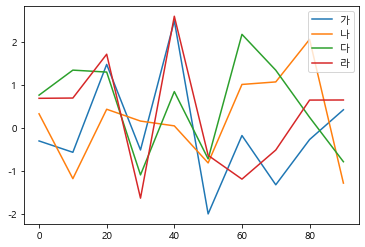

In [17]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=["가", "나", "다", "라"],
                  index=np.arange(0, 100, 10))
df1
df1.plot()

<AxesSubplot:>

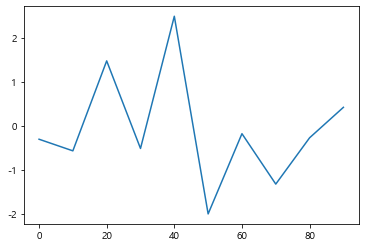

In [18]:
df1["가"].plot()

### 2. 막대 그래프

<AxesSubplot:>

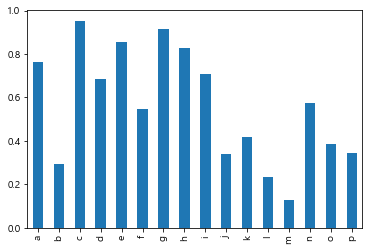

In [22]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2
s2.plot(kind="bar")
s2.plot.bar()

<AxesSubplot:>

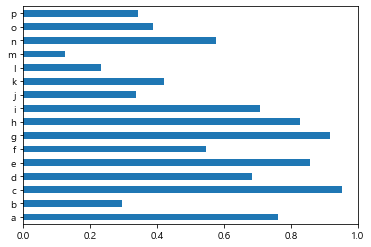

In [24]:
s2.plot(kind="barh")
s2.plot.barh()

<AxesSubplot:>

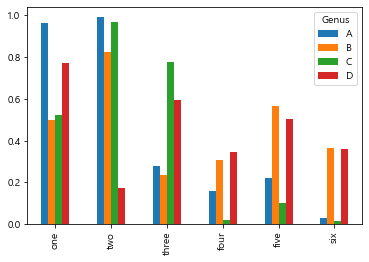

In [28]:
df2 = pd.DataFrame(np.random.rand(6, 4),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df2
df2.plot(kind="bar")

<AxesSubplot:>

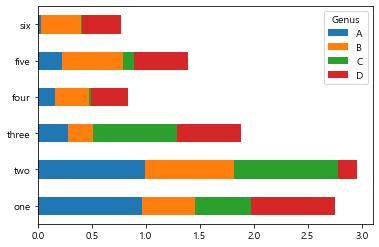

In [30]:
df2.plot(kind="barh", stacked=True)

### 3. histogram

+ X변수가 가질 수 있는 값의 범위
+ 값만 필요하고 인덱스는 필요 없다

<AxesSubplot:>

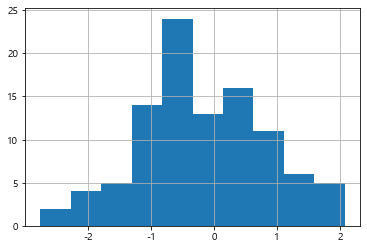

In [32]:
s = pd.Series(np.random.normal(0, 1, size=100))
s
s.hist()

<AxesSubplot:>

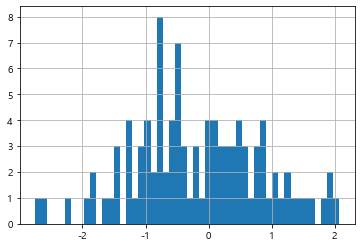

In [33]:
s.hist(bins=50)

### 4. 산포도(산점도, Scatter Plot)

+ 두 변수의 관계를 확인 : 양, 음

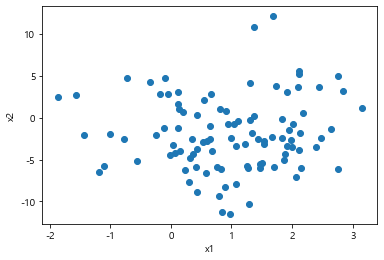

In [43]:
x1 = np.random.normal(1, 1, size=(100, 1))
x1

x2 = np.random.normal(-2, 4, size=(100, 1))
x2

x = np.concatenate((x1, x2), axis=1)
x[:5]

df = pd.DataFrame(x, columns=["x1", "x2"])
df

df.plot.scatter("x1", "x2")
plt.scatter(df["x1"], df["x2"])

### 5. 상자 그래프(Boxplot)

<AxesSubplot:>

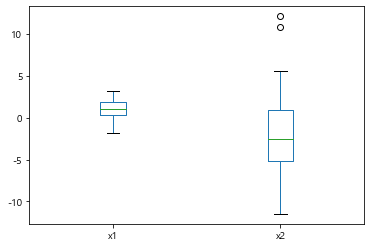

In [44]:
df.plot.box()

### 6. 활용 예제1

+ seaborn의 tips 샘플

#### 1) 데이터 준비

In [47]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 2) total_bill에 대한 금액 분포 확인

Text(0, 0.5, 'Total Bill')

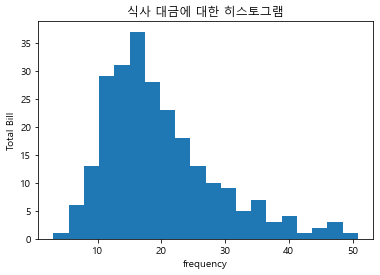

In [51]:
# tips["total_bill"].hist()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(tips["total_bill"], bins=20)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

#### 3) total_bill과 tip의 관계를 알고 싶다.

Text(0, 0.5, 'Tip')

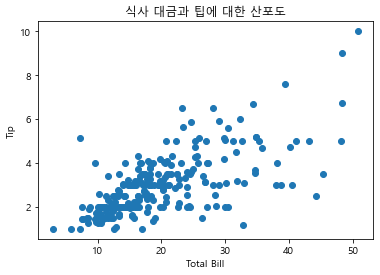

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"])
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

#### 4) 성별에 따른 total_bill과 tip의 관계를 알고 싶다.

Text(0, 0.5, 'Tip')

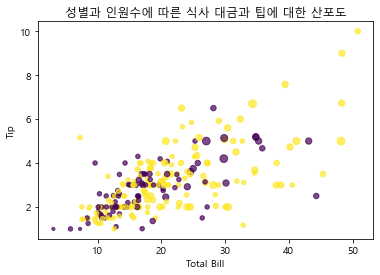

In [58]:
def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1
    
#######################################

tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], alpha=0.7)
#ax.set_title("성별에 따른 식사 대금과 팁에 대한 산포도")

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], alpha=0.7,
          s = tips["size"]*10)
ax.set_title("성별과 인원수에 따른 식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

#### 5) 성별과 팁의 관계

Text(0, 0.5, 'Tip')

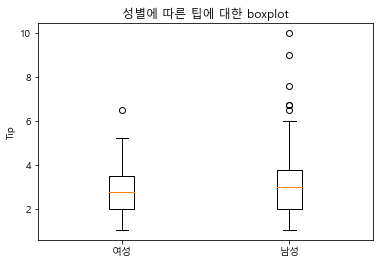

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"]=="Female"]["tip"], tips[tips["sex"]=="Male"]["tip"]], 
          labels=["여성", "남성"])
ax.set_title("성별에 따른 팁에 대한 boxplot")
ax.set_ylabel("Tip")

### 7. 활용 예제2

+ 전국 신규 민간 아파트 분양가격 동향

#### 1) 데이터 준비

+ https://data.go.kr/dataset/3035522/fileData.do

In [5]:
##### 데이터 불러오기 및 확인
apt = pd.read_csv("data/20200331.csv", encoding="euc-kr")
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [6]:
apt.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [7]:
##### column 이름을 영어로 변경하고 (city, size, year, month, price), price는 숫자로 데이터 타입 변경
apt1 = apt
apt1.columns = ["city", "size", "year", "month", "price"]
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    4590 non-null   object
 1   size    4590 non-null   object
 2   year    4590 non-null   int64 
 3   month   4590 non-null   int64 
 4   price   4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [9]:
apt1["price"] = pd.to_numeric(apt1["price"].str.strip())
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


In [15]:
%%time
##### 서울만 선택해서 "전체" size만 확인
apt_sa = apt1[(apt1["city"] == "서울") & (apt1["size"] == "전체")]

Wall time: 1.03 ms


In [14]:
%%time
apt1.query('(city=="서울") and (size=="전체")')

Wall time: 2.95 ms


,city,size,year,month,price
0,서울,전체,2015,10,5841.0
85,서울,전체,2015,11,6050.0
170,서울,전체,2015,12,6041.0
255,서울,전체,2016,1,6108.0
340,서울,전체,2016,2,6111.0
425,서울,전체,2016,3,6173.0
510,서울,전체,2016,4,6241.0
595,서울,전체,2016,5,6264.0
680,서울,전체,2016,6,6208.0
765,서울,전체,2016,7,6254.0


In [16]:
##### city, size컬럼 삭제하고 다중index로(year, month) 조정
apt_sa1 = apt_sa.drop(["city", "size"], axis=1)

In [17]:
apt_sa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    54 non-null     int64  
 1   month   54 non-null     int64  
 2   price   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.7 KB


In [18]:
apt_sa1 = apt_sa1.set_index(["year", "month"])
apt_sa1.head(10)

price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0

<AxesSubplot:xlabel='year,month'>

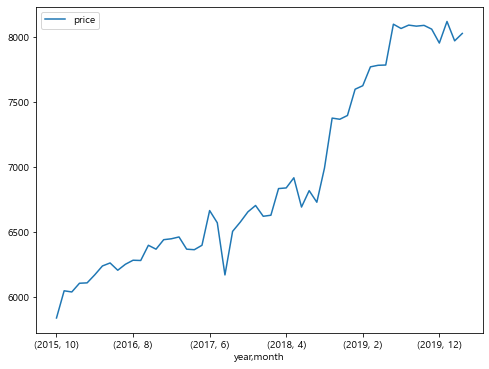

In [20]:
##### 서울지역 전체 크기별 월별 제곱미터 당 가격(천원) 변화 추이를 그래프로 출력("전체" 크기만)
apt_sa1.plot(figsize=(8, 6))

### 8. seaborn

In [61]:
tips = sns.load_dataset("tips")

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Total Bill')

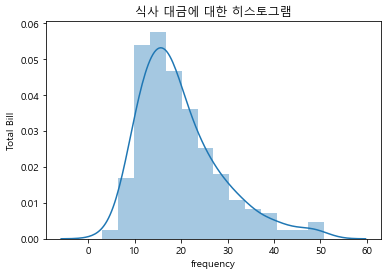

In [66]:
##### total_bill에 대한 금액 분포 확인

ax = sns.distplot(tips["total_bill"])

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Total Bill')

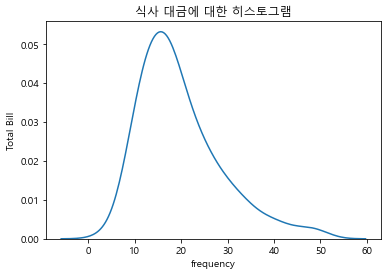

In [67]:
ax = sns.distplot(tips["total_bill"], hist=False)

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Total Bill')

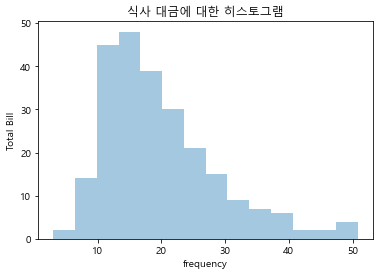

In [68]:
ax = sns.distplot(tips["total_bill"], kde=False)

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acorn\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Total Bill')

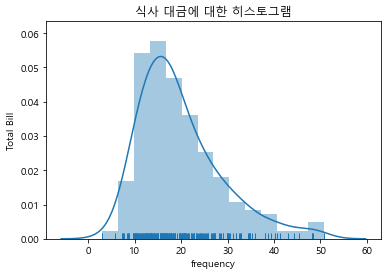

In [70]:
ax = sns.distplot(tips["total_bill"], rug=True)

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

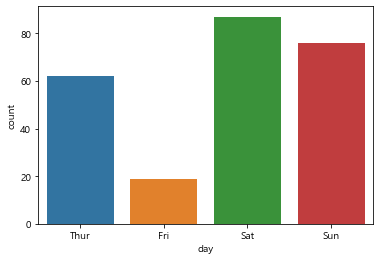

In [71]:
##### 요일별로 인원수 파악

sns.countplot("day", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

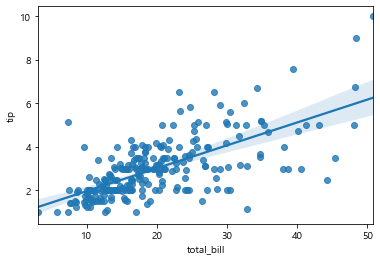

In [72]:
sns.regplot(x='total_bill', y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

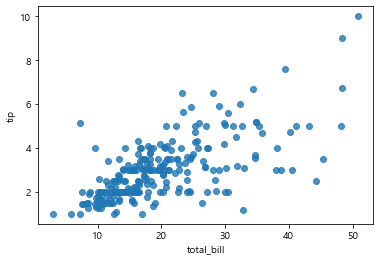

In [73]:
sns.regplot(x='total_bill', y="tip", data=tips, fit_reg=False)

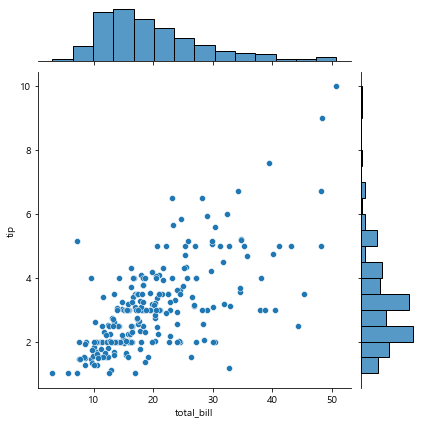

In [75]:
sns.jointplot(x='total_bill', y="tip", data=tips)

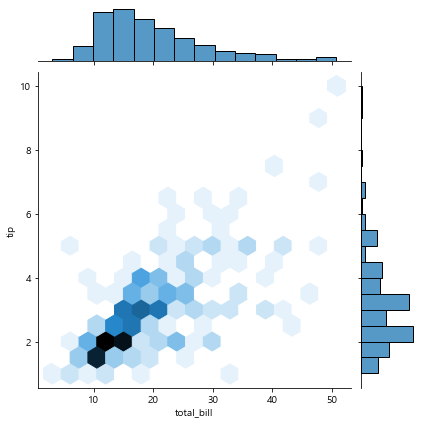

In [76]:
sns.jointplot(x='total_bill', y="tip", data=tips, kind="hex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

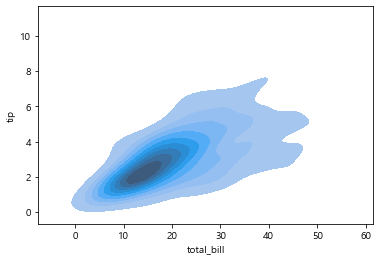

In [78]:
sns.kdeplot(x='total_bill', y="tip", data=tips, shade=True)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

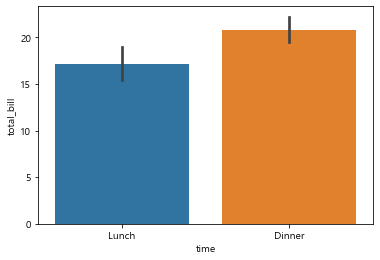

In [79]:
sns.barplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

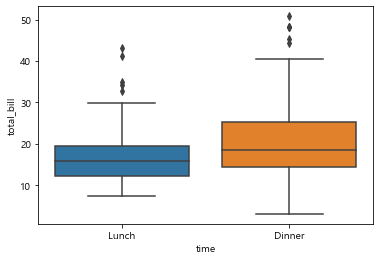

In [80]:
sns.boxplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

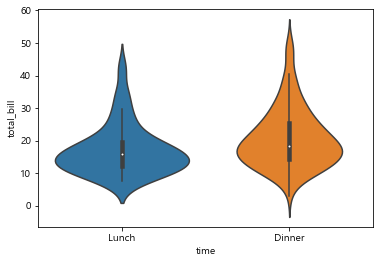

In [81]:
sns.violinplot(x="time", y="total_bill", data=tips)

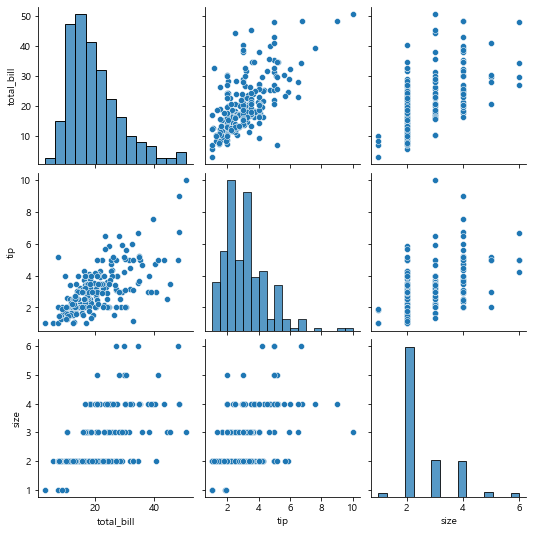

In [82]:
sns.pairplot(tips)

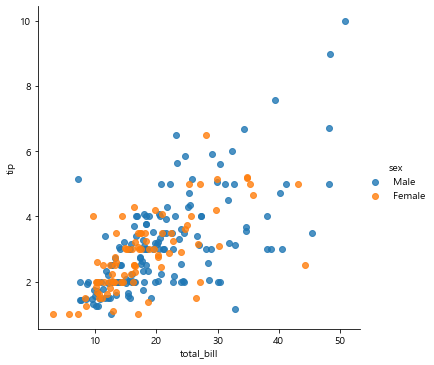

In [85]:
##### 성별에 따른 total_bill과 tip의 관계를 알고 싶다.

sns.lmplot(x='total_bill', y="tip", data=tips, fit_reg=False, hue="sex")

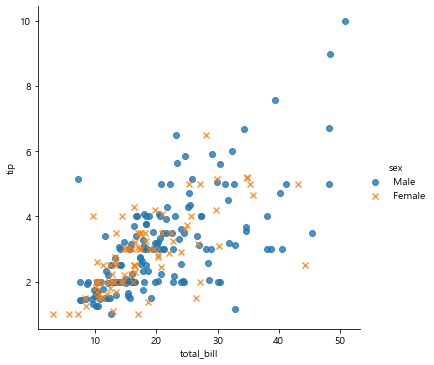

In [86]:
sns.lmplot(x='total_bill', y="tip", data=tips, fit_reg=False, hue="sex",
          markers=["o", "x"])

### 9. 활용 예제2

+ 타이타닉 샘플 : https://www.kaggle.com/c/titanic

#### 1) 데이터 준비

In [38]:
train = pd.read_csv("data/train.csv")
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 2) EDA

In [31]:
def bar_chart(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))

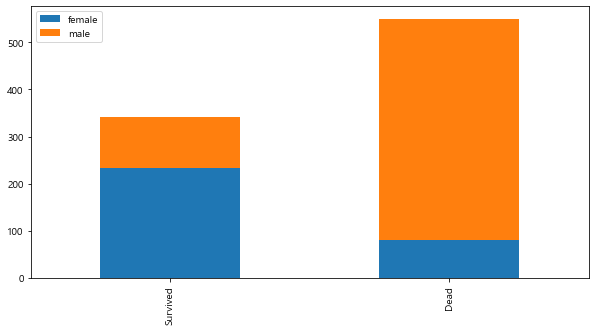

In [32]:
bar_chart("Sex")

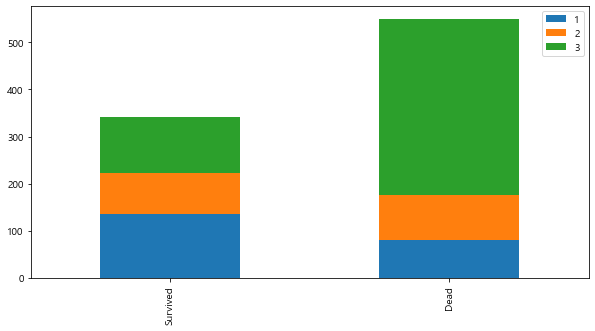

In [33]:
bar_chart("Pclass")

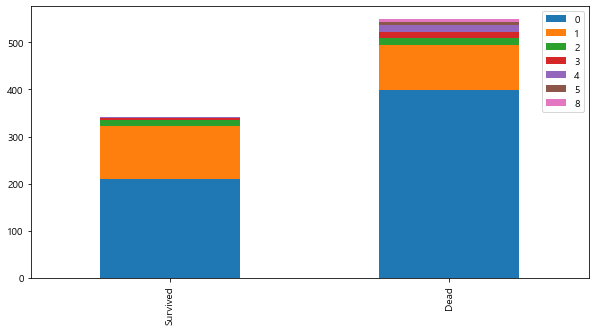

In [35]:
bar_chart("SibSp")

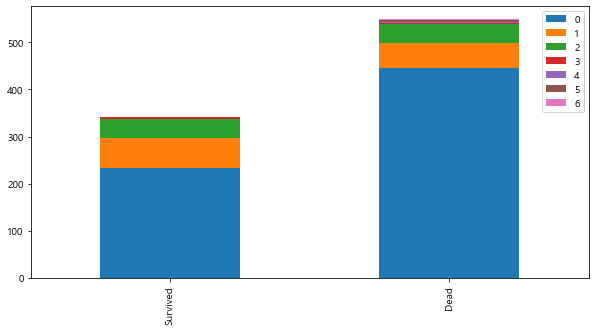

In [36]:
bar_chart("Parch")

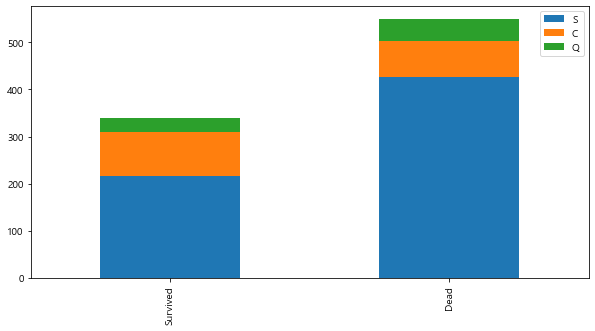

In [37]:
bar_chart("Embarked")

#### 3) Feature Engineering

In [43]:
##### Name
train["title"] = train["Name"].str.extract(" ([A-Za-z]+)\.")
train["title"].value_counts()

title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Major":3, "Mlle":3,
                "Col":3, "Sir":3, "Don":3, "Mme":3, "Lady":3, "Johkheer":3, "Countess":3,
                "Capt":3, "Ms":3}

train["title"] = train["title"].map(title_mapping)
train["title"].value_counts()

0.0    517
1.0    182
2.0    125
3.0     66
Name: title, dtype: int64

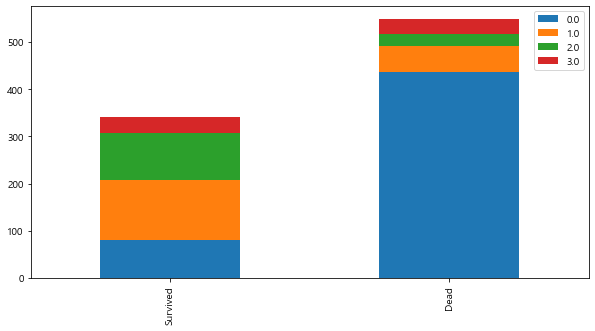

In [44]:
bar_chart("title")

In [51]:
##### Age

train["Age"].fillna(train.groupby("title")["Age"].transform("median"), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        890 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


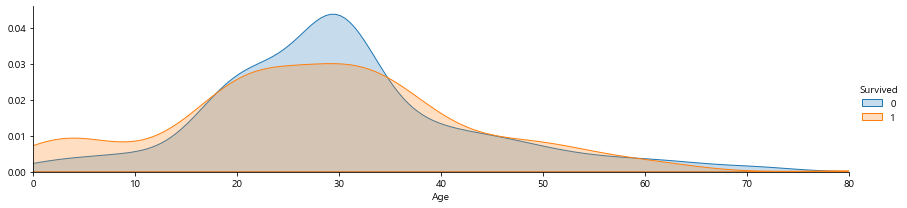

In [56]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
facet.set(xlim=(0, train["Age"].max()))

(0.0, 20.0)

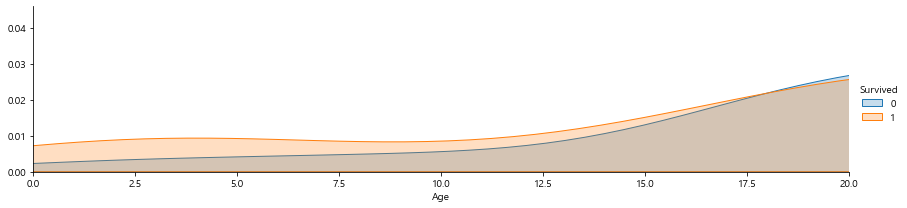

In [57]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
facet.set(xlim=(0, train["Age"].max()))
plt.xlim(0, 20)

(20.0, 30.0)

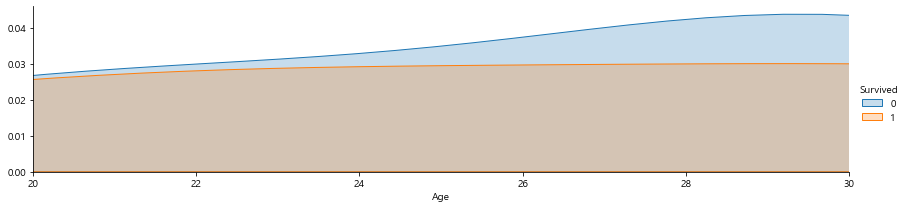

In [58]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
facet.set(xlim=(0, train["Age"].max()))
plt.xlim(20, 30)

(30.0, 40.0)

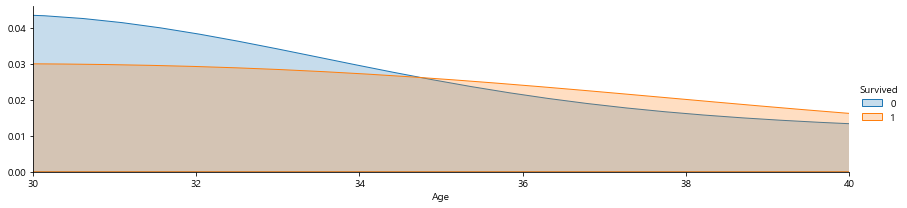

In [59]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
facet.set(xlim=(0, train["Age"].max()))
plt.xlim(30, 40)

### 10. 지도 시각화

+ pip install folium

In [60]:
import folium

In [65]:
# map = folium.Map(location=[37.497911, 127.027558])
# map = folium.Map(location=[37.497911, 127.027558], zoom_start=15)
map = folium.Map(location=[37.497911, 127.027558], zoom_start=15, tiles="Stamen Toner")
map

#### 1) 미국 50개주의 실업률 표시

In [66]:
state_unemp = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [69]:
state_geo = "data/map/folium_us-states.json"

map = folium.Map(location=[40, -98], zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id",
              columns=["State", "Unemployment"], fill_color="YlGn")

map

#### 2) Marking

In [75]:
map = folium.Map(location=[37.497911, 127.027558], zoom_start=15)

# marker = folium.Marker(location=[37.497911, 127.027558], icon=folium.Icon(color="red", icon="star"))
# marker.add_to(map)

marker = folium.Marker(location=[37.497911, 127.027558], 
                       icon=folium.Icon(color="red", icon="star"),
                      popup="강남역 근처").add_to(map)

folium.CircleMarker(location=[37.497911, 127.027558], popup="강남역 근처",
                   radius=50, color="#ffffgg", fill_color="#fffggg").add_to(map)

map

In [79]:
from folium import IFrame

map = folium.Map(location=[37.497911, 127.027558], zoom_start=15)
text = "많은 양의 텍스트 데이터 입력"

iframe = folium.IFrame(text, width=300, height=280)
pop = folium.Popup(iframe, max_width=3000)

child = folium.Marker(location=[37.497911, 127.027558], popup=pop, icon=folium.Icon(icon_color="green"))
map.add_child(child)

map

### 11. WordCloud

+ pip install wordcloud

In [15]:
from wordcloud import WordCloud, STOPWORDS

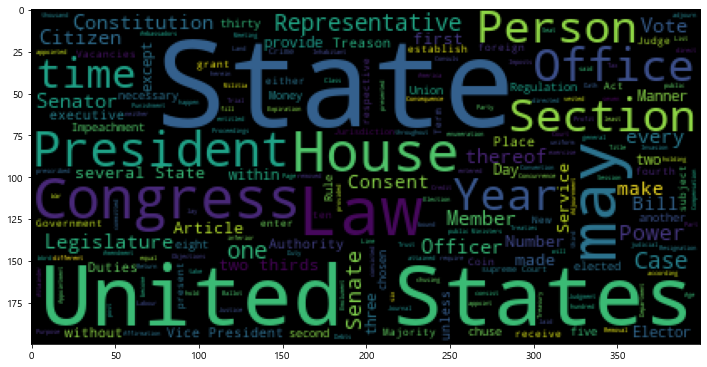

In [86]:
text = open("data/wordcloud/constitution.txt")
text = text.read()
text

wc = WordCloud().generate(text)
dir(wc)
wc.words_

plt.figure(figsize=(12, 12))
plt.imshow(wc)

(-0.5, 399.5, 199.5, -0.5)

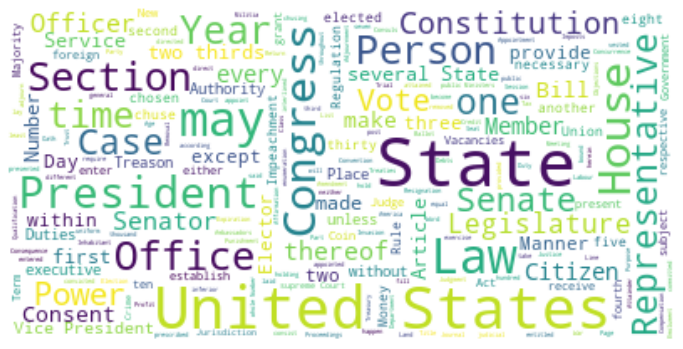

In [89]:
wc = WordCloud(max_font_size=40, background_color="white").generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

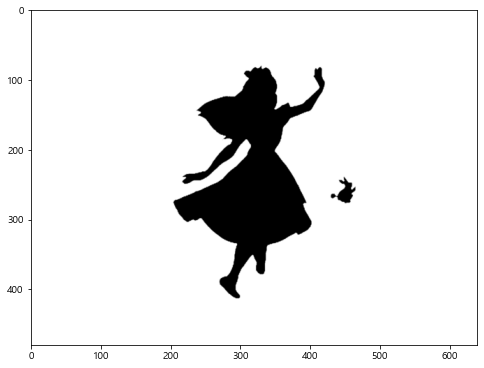

In [19]:
from PIL import Image

alice_mask = np.array(Image.open("data/wordcloud/alice_mask.png"))
alice_mask

plt.figure(figsize=(8, 8))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

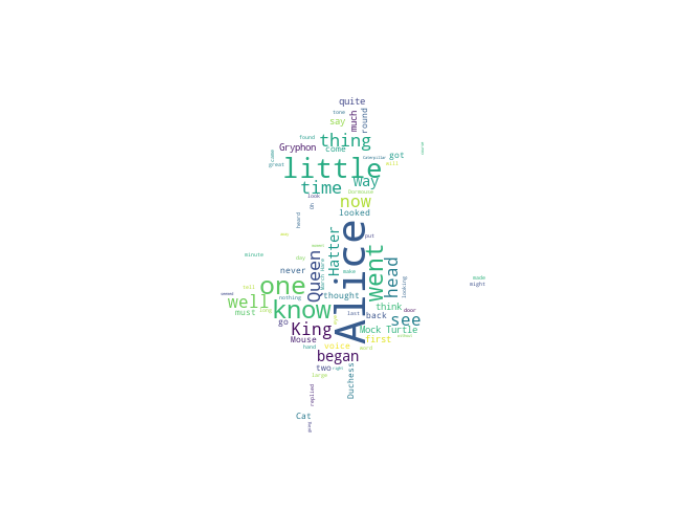

In [20]:
# wc = WordCloud(max_font_size=40, background_color="black", mask=alice_mask).generate(text)

text = open("data/wordcloud/alice.txt").read()
text

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(max_font_size=40, background_color="white", mask=alice_mask, 
              stopwords=stopwords, max_words=500).generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

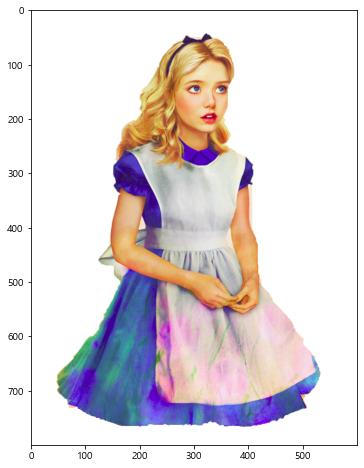

In [21]:
alice_color = np.array(Image.open("data/wordcloud/alice.png"))
alice_color

plt.figure(figsize=(8, 8))
plt.imshow(alice_color)

(-0.5, 599.5, 799.5, -0.5)

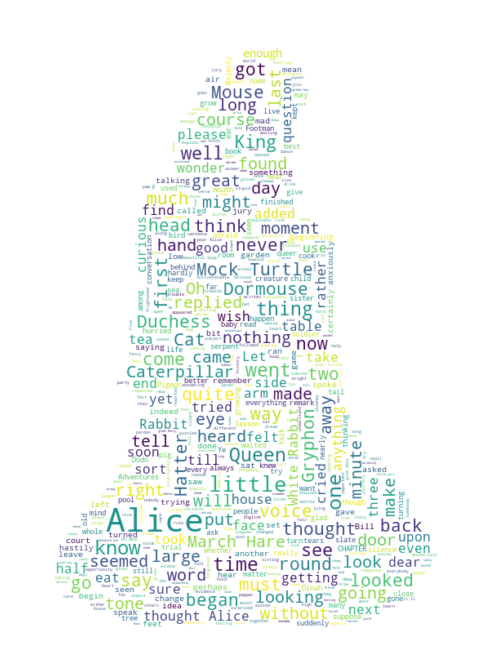

In [22]:
wc = WordCloud(max_font_size=40, background_color="white", mask=alice_color, 
              stopwords=stopwords, max_words=500).generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(-0.5, 599.5, 799.5, -0.5)

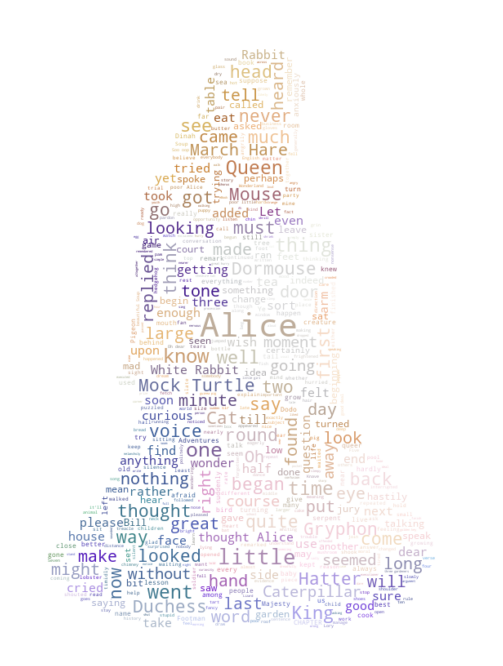

In [105]:
import wordcloud

wc = WordCloud(max_font_size=40, background_color="white", mask=alice_color, 
              stopwords=stopwords, max_words=500).generate(text)

image_colors = wordcloud.ImageColorGenerator(alice_color)

plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func = image_colors), interpolation="bilinear")
plt.axis("off")

In [16]:
##### http://konlpy.org
##### pip install konlpy
##### https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
# 기존 konlpy 삭제 : pip uninstall konlpy
# 버전에 맞는 jpype1 설치
# 다시 konlpy 설치 : pip install konlpy
# pip uninstall jpype1

from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

3882
3211


(-0.5, 399.5, 199.5, -0.5)

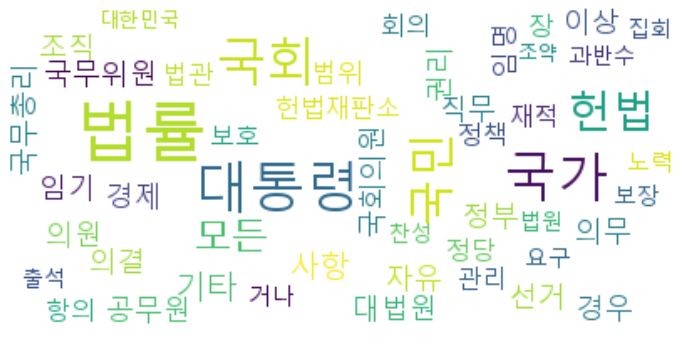

In [24]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

# 형태소 분석
okt = Okt()
# okt.nouns("아버지가방에들어가신다")
token_ko = okt.nouns(ko_text)
token_ko
print(len(token_ko))

# 불용어 처리
stop_words = ["제", "월", "일", "조", "수", "때", "그", "이", "바", "및", "안", "정", "위", "관"]
token_ko = [each_word for each_word in token_ko if each_word not in stop_words]
print(len(token_ko))

# 워드 카운팅
ko = nltk.Text(token_ko, name="대한민국 헌법")
dir(ko)
data = ko.vocab().most_common(50)

wc = WordCloud(max_font_size=40, background_color="white",  
              font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")